In [2]:
!pip install tensorflow_datasets

  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21494 sha256=eb670d08bbd138fd3a435c34834b506c64741453e1a203d4611334985caad0ef
  Stored in directory: c:\users\varsha\appdata\local\pip\cache\wheels\54\aa\01\724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
Successfully built promise
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.14.1
    Uninstalling absl-py-0.14.1:
      Successfully uninstalled absl-py-0.14.1


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#DATASET
train_data,validation_data,test_data=tfds.load(
name="imdb_reviews",
    split=('train[:60%]','train[60%:]','test'),
    as_supervised=True
    )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-train.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-test.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-unsupervised.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to C:\Users\VARSHA\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [6]:
#HUB LAYER
embedding="https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer=hub.KerasLayer(embedding,input_shape=[],dtype=tf.string,trainable=True)

In [7]:
hub_layer

In [10]:
model=tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16,activation="relu"))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [12]:
#evaluating the model
results=model.evaluate(test_data.batch(512),verbose=2)

49/49 - 1s - loss: 2.2742 - accuracy: 0.4825


In [13]:
for name,value in zip(model.metrics_names,results):
    print("%s:%.3f" % (name,value))

loss:2.274
accuracy:0.482


In [14]:
history=model.fit(train_data.batch(512),epochs=20,verbose=1)

Epoch 1/20
30/30 [==============================] - 1s 35ms/step - loss: 1.3542 - accuracy: 0.4829
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.9281 - accuracy: 0.5175
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.7874 - accuracy: 0.5623
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.7013 - accuracy: 0.6019
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.6433 - accuracy: 0.6337 0s - loss: 0.6454 - accuracy: 
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6005 - accuracy: 0.6572
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5652 - accuracy: 0.6849
Epoch 8/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5329 - accuracy: 0.7086
Epoch 9/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5015 - accuracy: 0.7329
Epoch 10/20
30/30 [==============================] - 1s 30ms/step - loss: 0.47

Text(0.5, 1.0, 'Epochs Vs Accuracy')

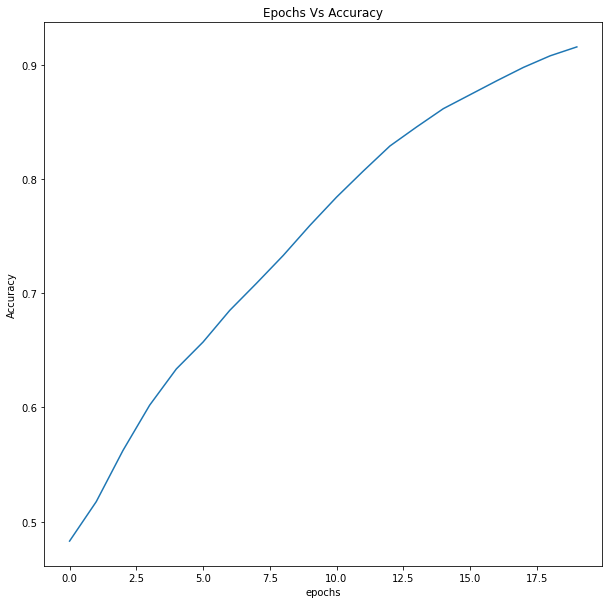

In [15]:
#Accuracy vs epoch graph
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Epochs Vs Accuracy')

Text(0.5, 1.0, 'Epochs Vs. Accuracy')

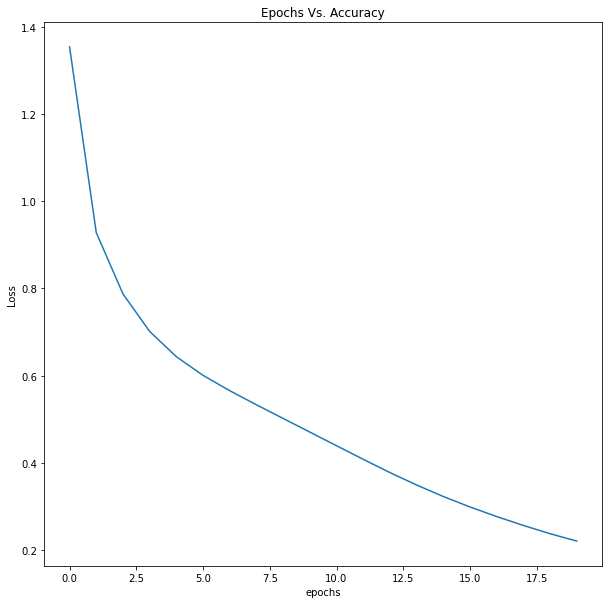

In [16]:
#Loss vs Epoch graph

plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Epochs Vs. Accuracy')